# The simplest way to detect class imbalance is to check the distribution of the target variable.

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

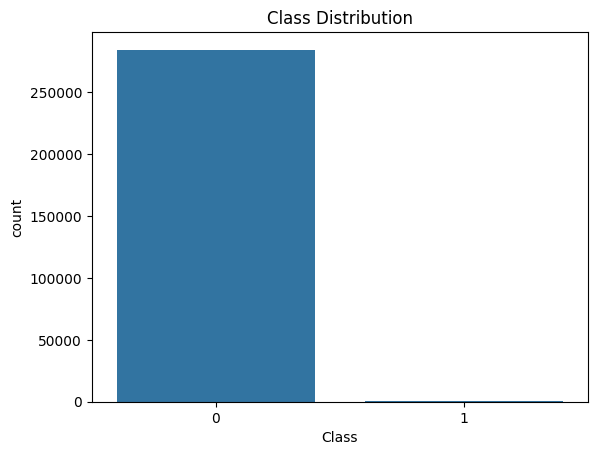

Gini Index: 0.003449002848032068
Shannon Entropy: 0.012714681335936208


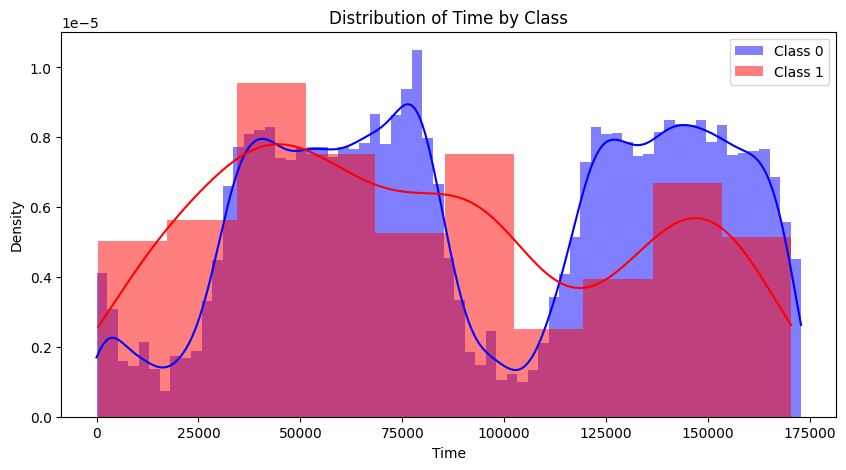

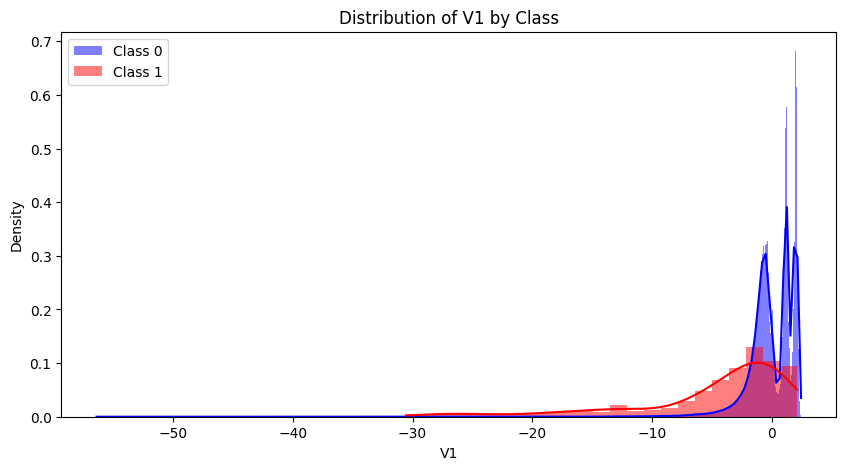

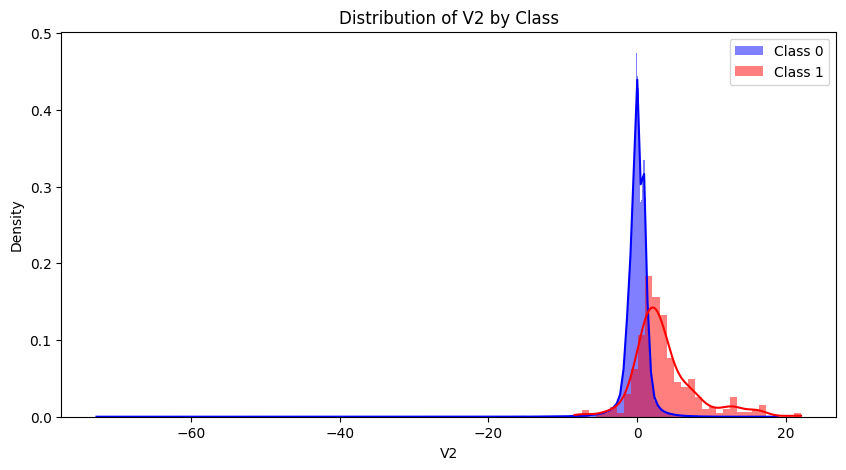

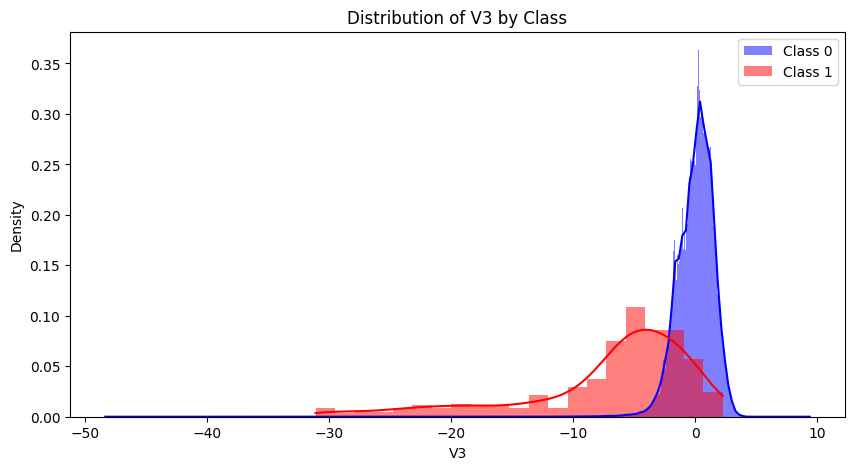

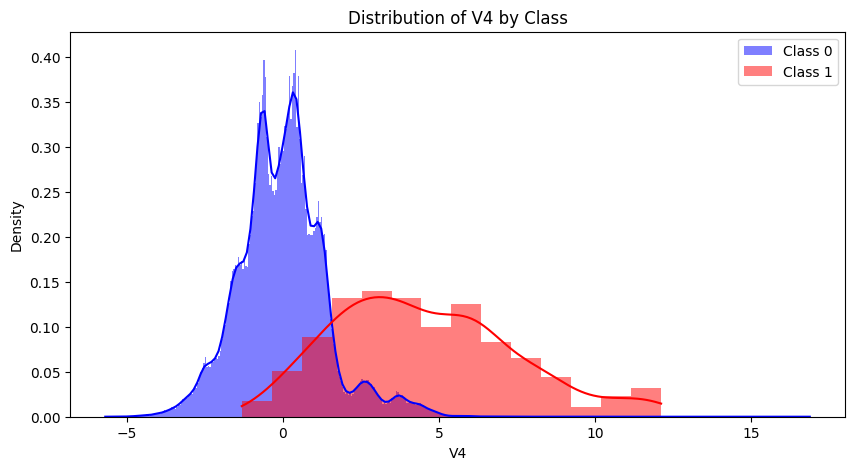

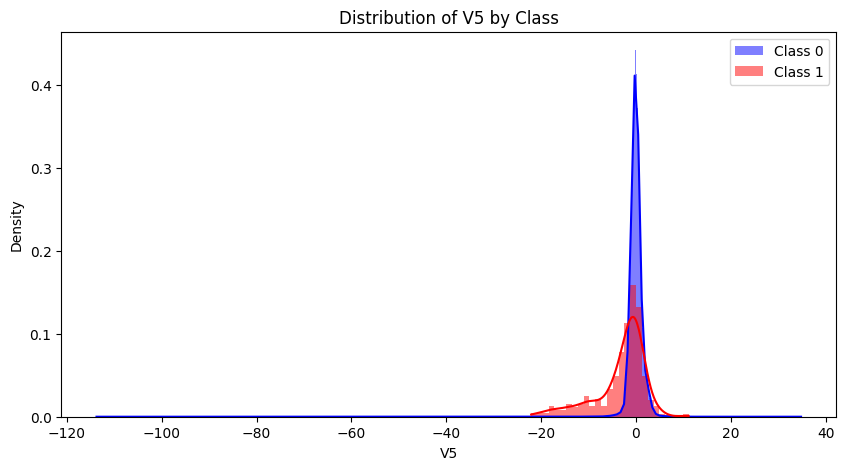

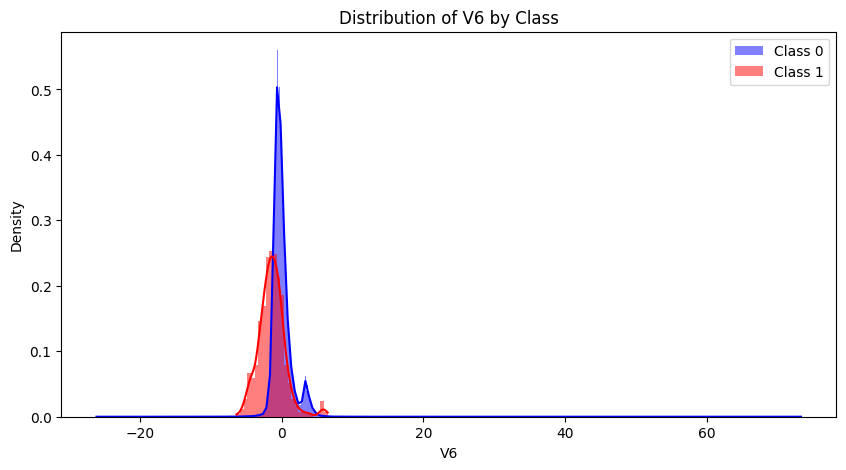

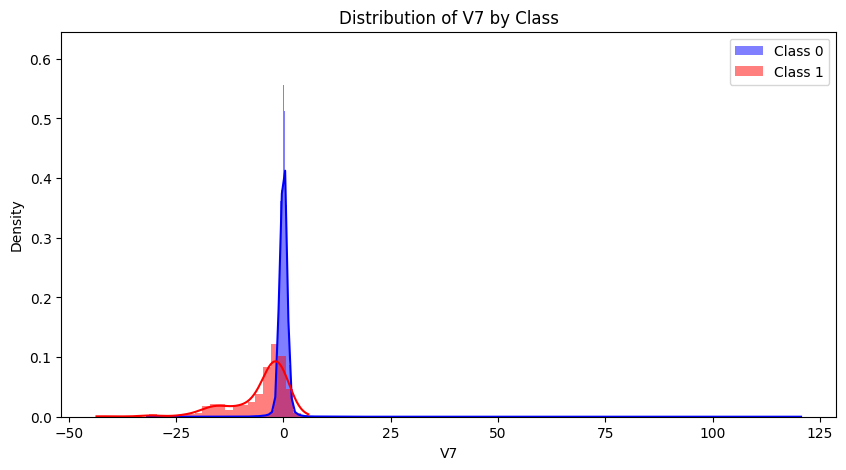

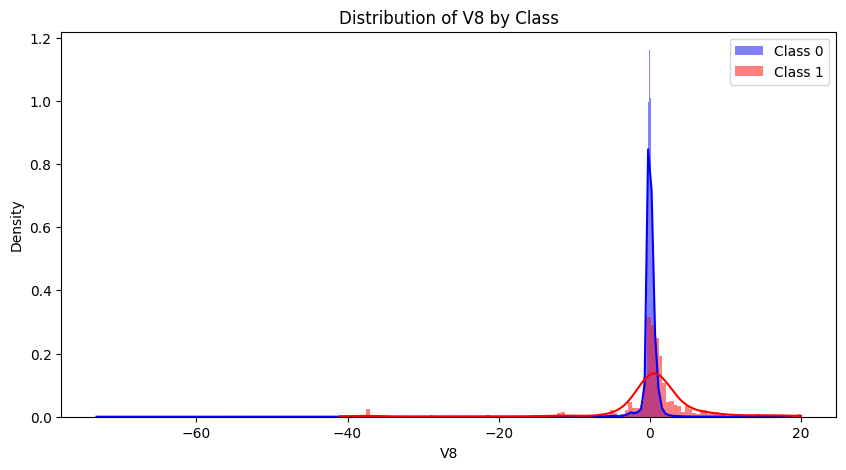

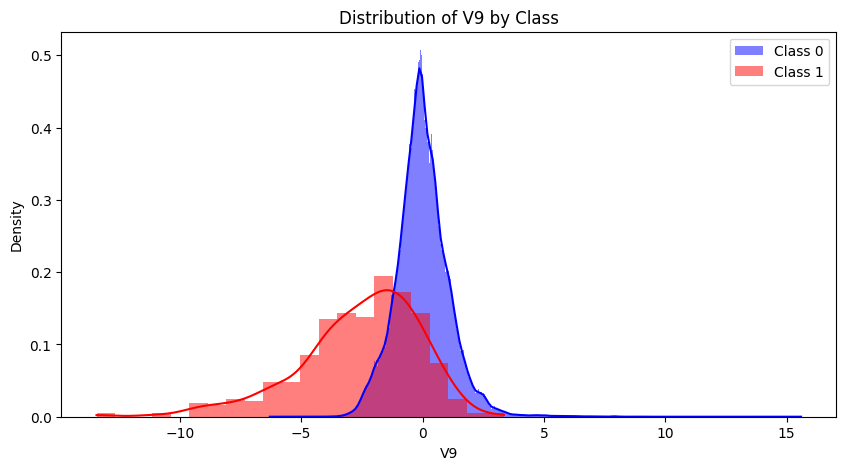

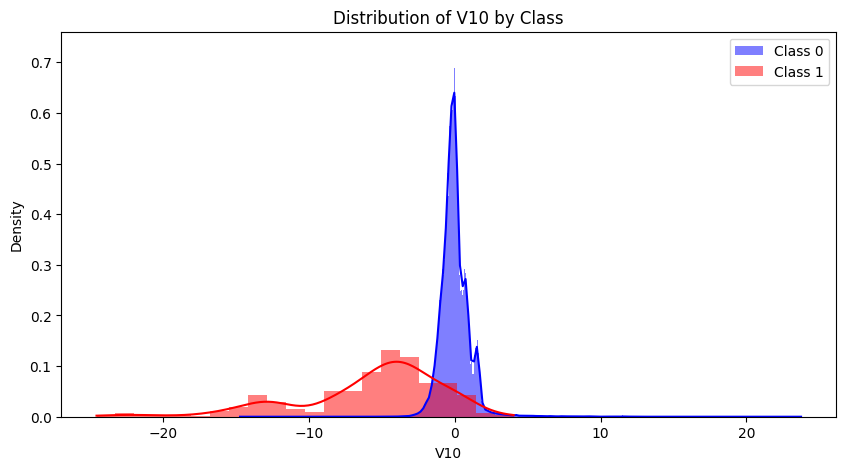

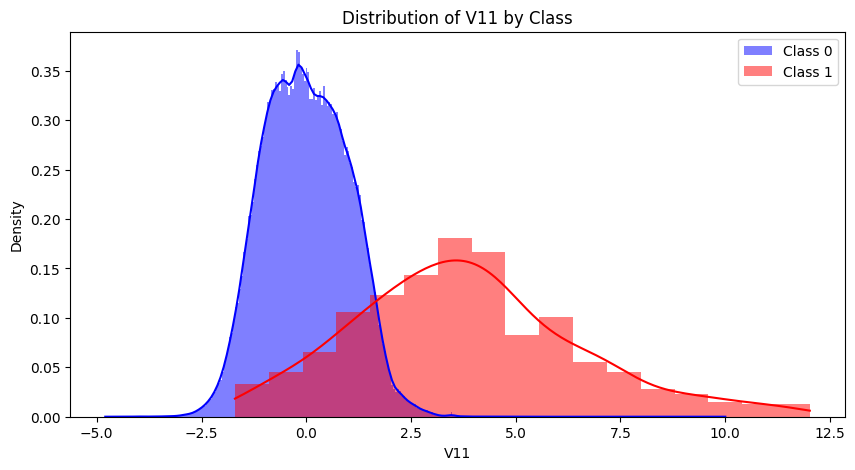

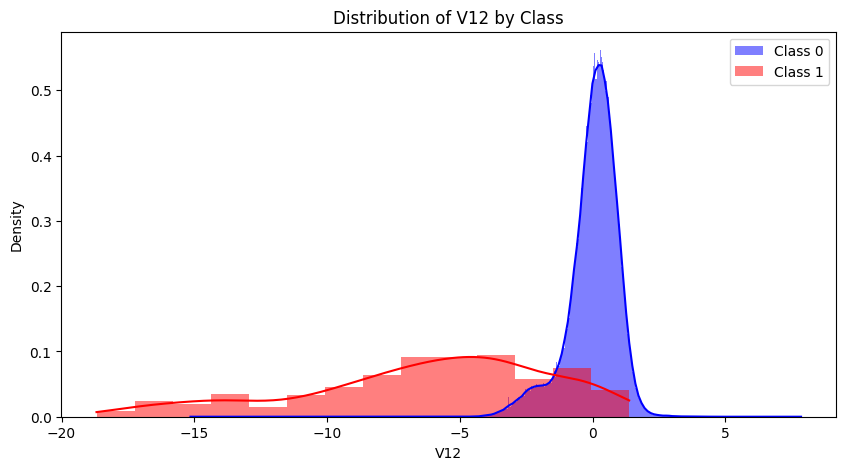

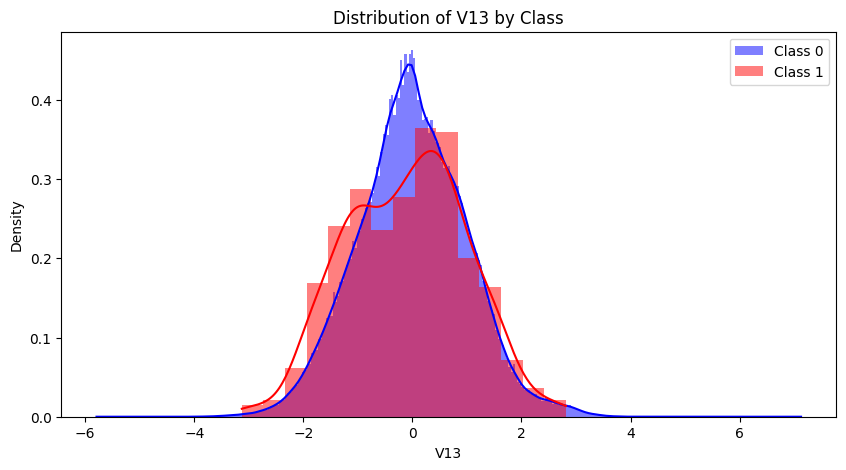

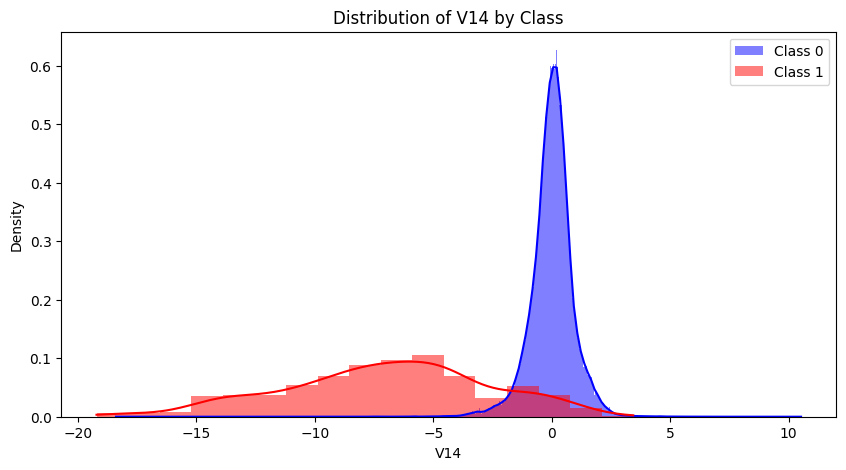

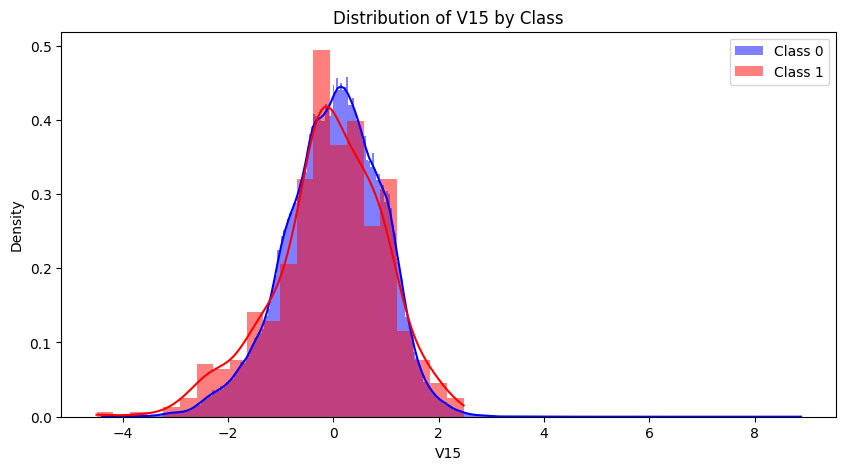

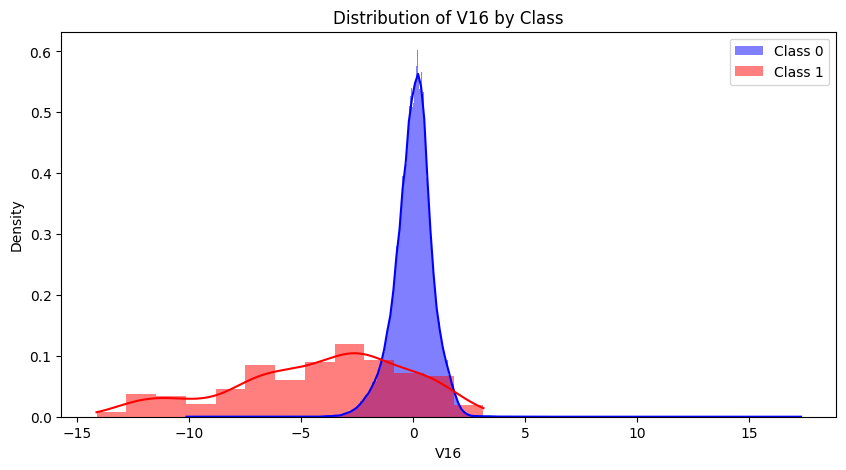

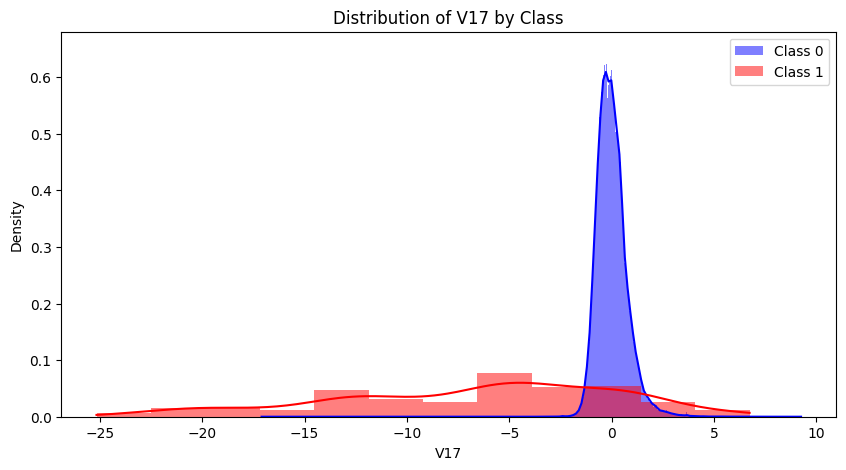

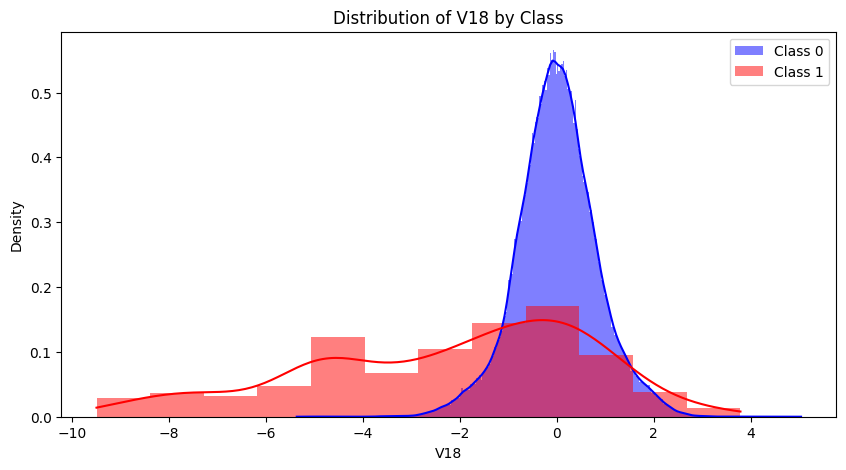

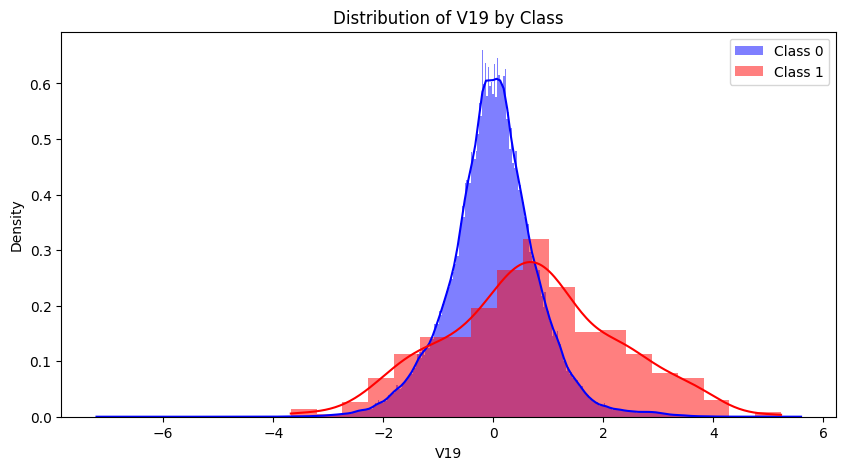

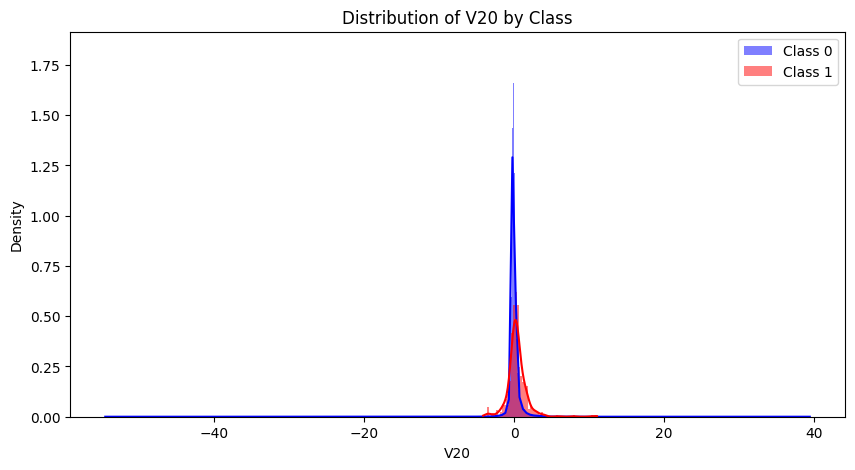

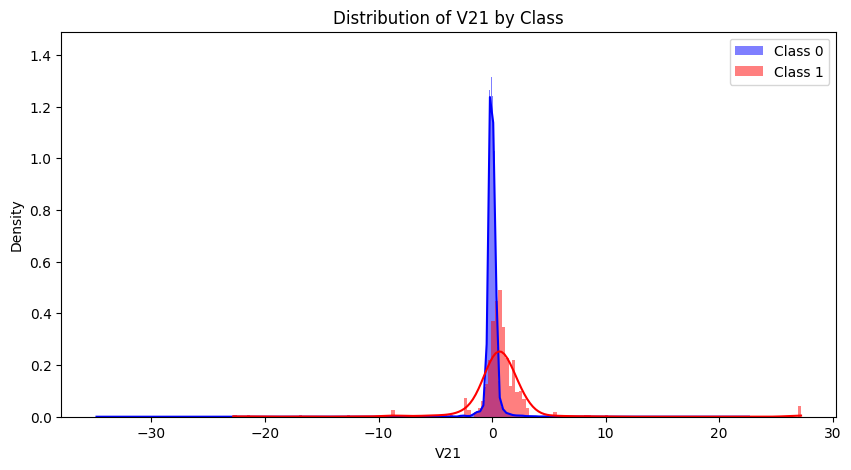

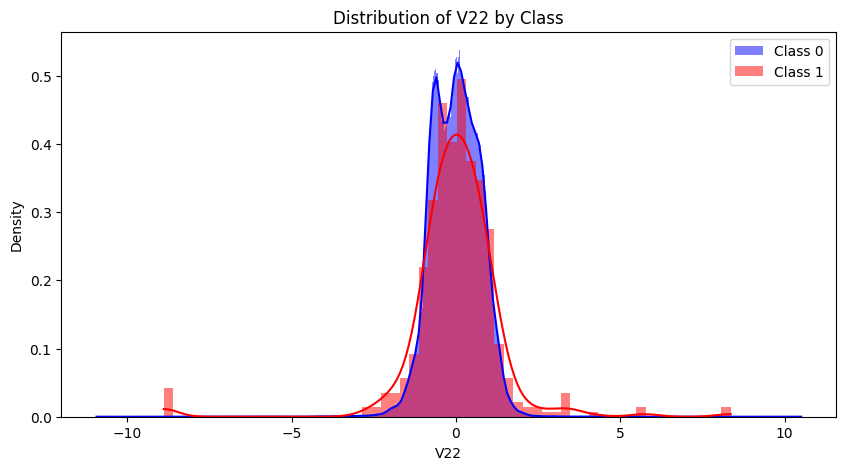

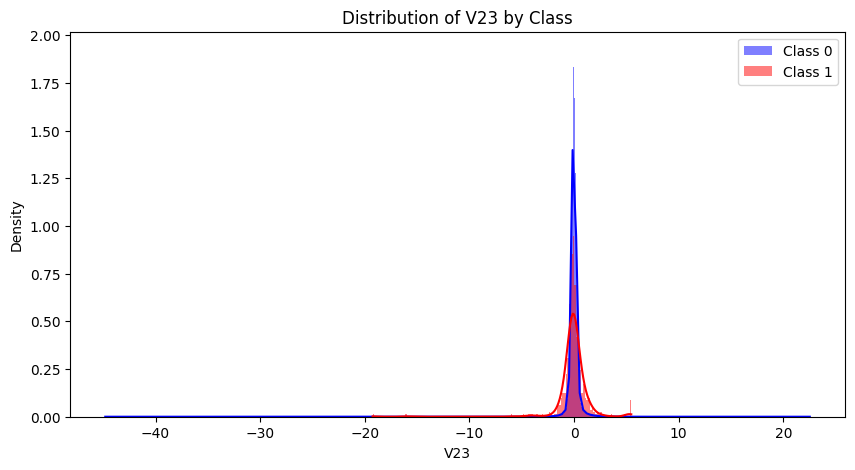

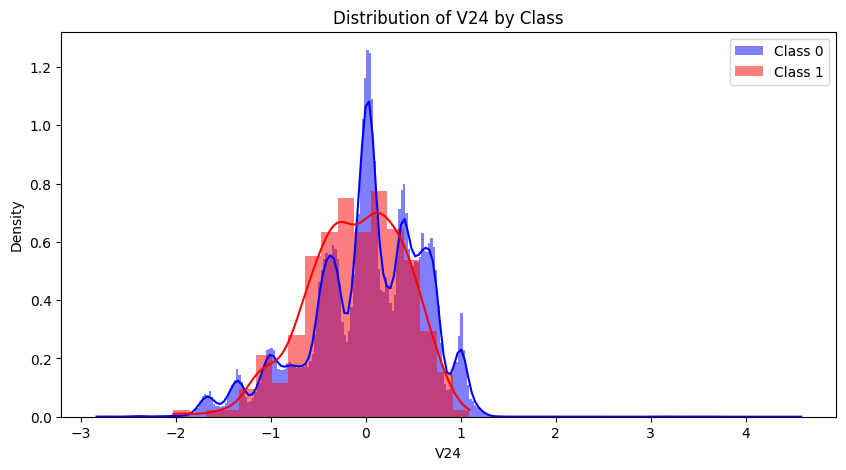

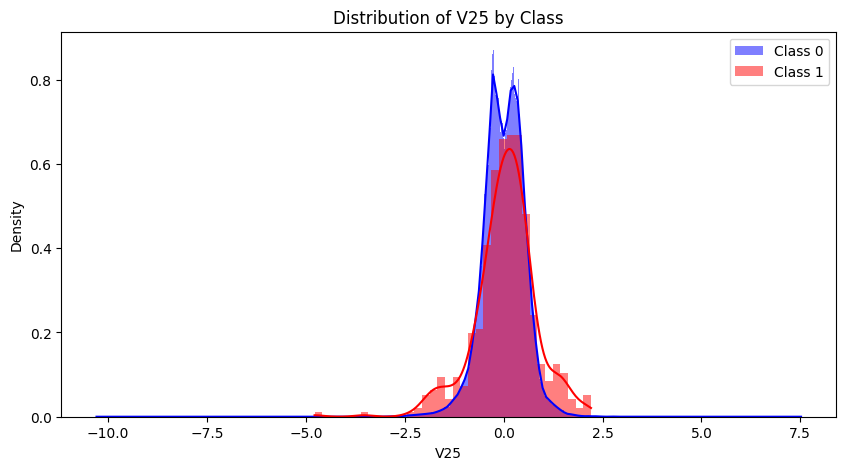

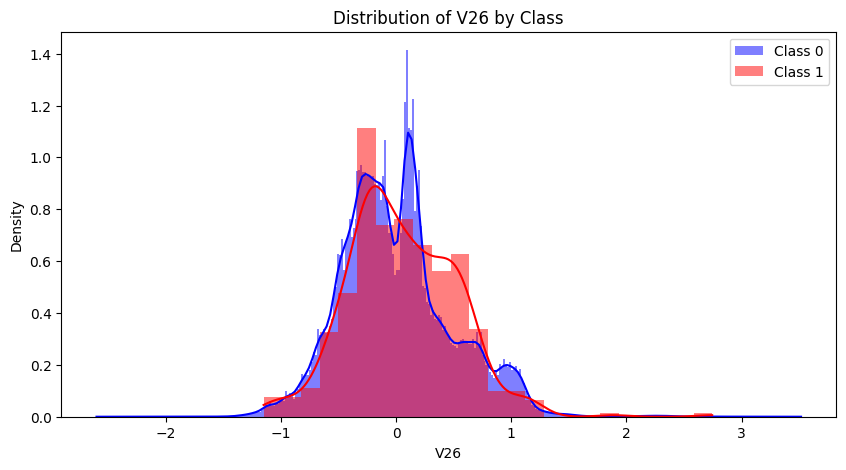

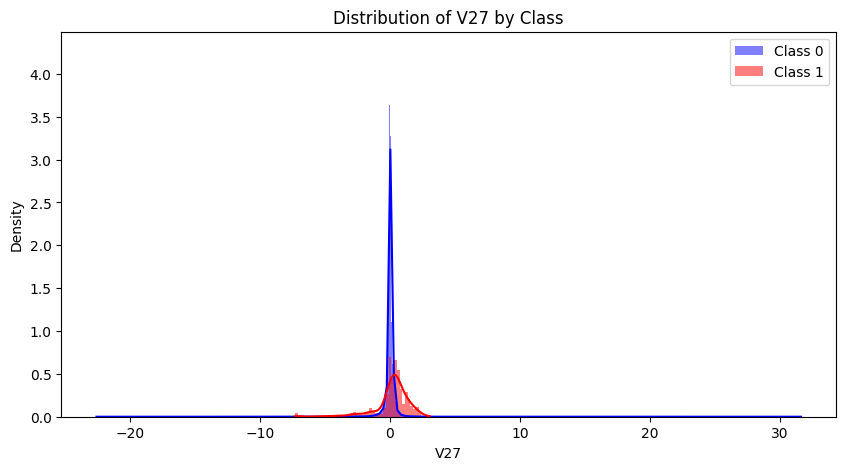

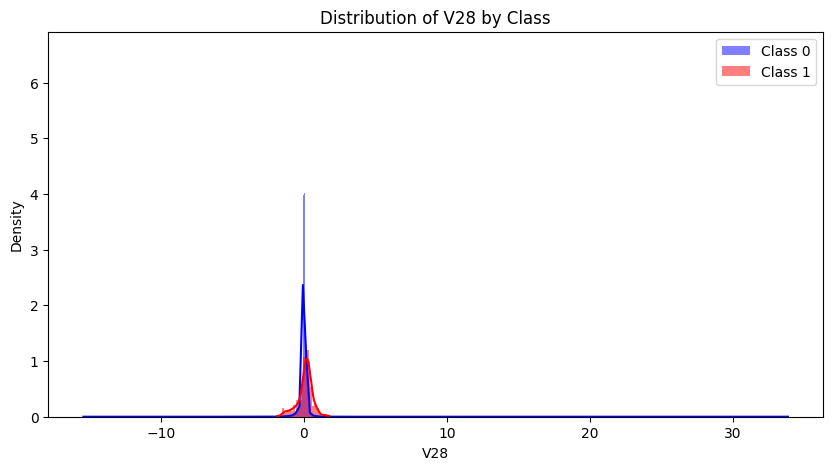

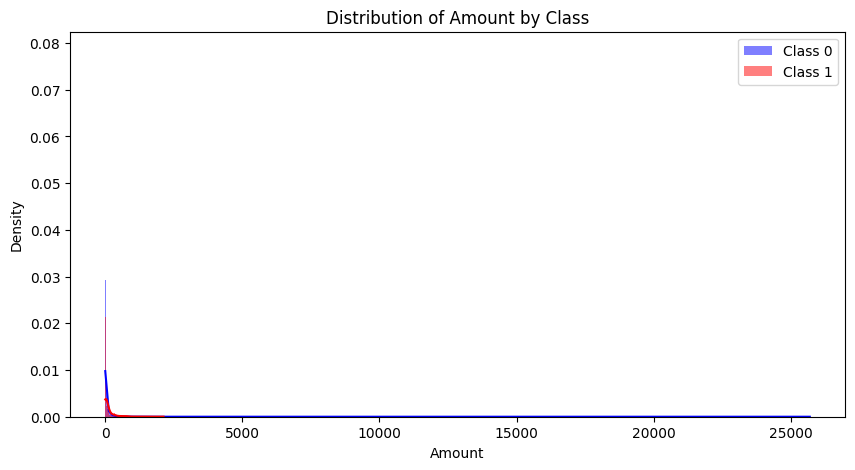

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy

# Load the dataset
df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')

# Display the first few rows
print(df.head())

# Display the distribution of the target variable
class_counts = df['Class'].value_counts()
print(class_counts)

# Calculate the class distribution ratios
class_ratios = class_counts / len(df)
print(class_ratios)

# Plot the class distribution
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

# Calculate Gini Index
def gini_index(labels):
    _, counts = np.unique(labels, return_counts=True)
    return 1 - sum((count / sum(counts)) ** 2 for count in counts)

gini = gini_index(df['Class'])
print(f'Gini Index: {gini}')

# Calculate Shannon Entropy
def shannon_entropy(labels):
    _, counts = np.unique(labels, return_counts=True)
    return entropy(counts)

entropy_value = shannon_entropy(df['Class'])
print(f'Shannon Entropy: {entropy_value}')

# Feature distributions by class
for feature in df.columns[:-1]:  # Exclude the target column 'Class'
    plt.figure(figsize=(10, 5))
    sns.histplot(df[df['Class'] == 0][feature], color='blue', label='Class 0', kde=True, stat="density", linewidth=0)
    sns.histplot(df[df['Class'] == 1][feature], color='red', label='Class 1', kde=True, stat="density", linewidth=0)
    plt.title(f'Distribution of {feature} by Class')
    plt.legend()
    plt.show()



# Explanation of Results
# Class Distribution: The output of value_counts() shows the number of instances in each class.
# Class Ratios: The output of the ratios calculation shows the proportion of each class in the dataset.
# Visualization: The count plot provides a visual representation of the class imbalance.
# Gini Index: A measure of inequality in the class distribution; a value close to 0 indicates high imbalance.
# Shannon Entropy: A measure of the uncertainty in the class distribution; a lower value indicates higher imbalance.
# Feature Distributions: The histograms for each feature by class help visualize how the feature values differ between the classes, providing insight into the data's structure and the impact of the imbalance.

# To handle the imbalanced dataset for the Credit Card Fraud Detection example, we can use several techniques such as oversampling the minority class, undersampling the majority class, or using a combination of both. Below is the complete code to handle the imbalance using different methods and then training a model to evaluate the performance.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Load the dataset
df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')

# Split data into features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle imbalanced data using Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled_rus, y_resampled_rus = rus.fit_resample(X_train_scaled, y_train)
print(f'Resampled dataset shape (Random Undersampling): {np.bincount(y_resampled_rus)}')

# Handle imbalanced data using Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled_ros, y_resampled_ros = ros.fit_resample(X_train_scaled, y_train)
print(f'Resampled dataset shape (Random Oversampling): {np.bincount(y_resampled_ros)}')

# Handle imbalanced data using SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train_scaled, y_train)
print(f'Resampled dataset shape (SMOTE): {np.bincount(y_resampled_smote)}')

# Train and evaluate the model using Random Undersampling
model_rus = LogisticRegression(random_state=42)
model_rus.fit(X_resampled_rus, y_resampled_rus)
y_pred_rus = model_rus.predict(X_test_scaled)
print('Random Undersampling:')
print(confusion_matrix(y_test, y_pred_rus))
print(classification_report(y_test, y_pred_rus))

# Train and evaluate the model using Random Oversampling
model_ros = LogisticRegression(random_state=42)
model_ros.fit(X_resampled_ros, y_resampled_ros)
y_pred_ros = model_ros.predict(X_test_scaled)
print('Random Oversampling:')
print(confusion_matrix(y_test, y_pred_ros))
print(classification_report(y_test, y_pred_ros))

# Train and evaluate the model using SMOTE
model_smote = LogisticRegression(random_state=42)
model_smote.fit(X_resampled_smote, y_resampled_smote)
y_pred_smote = model_smote.predict(X_test_scaled)
print('SMOTE:')
print(confusion_matrix(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))


Resampled dataset shape (Random Undersampling): [344 344]
Resampled dataset shape (Random Oversampling): [199020 199020]
Resampled dataset shape (SMOTE): [199020 199020]
Random Undersampling:
[[83387  1908]
 [   17   131]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.89      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Random Oversampling:
[[83478  1817]
 [   18   130]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443

SMOTE:
[[83402  1893]
 [   18   130]]
              precision    recall